In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Get the dataset

In [3]:
column_names = ["userid", "itemid", "rating", "timestamp"]
df = pd.read_csv("C:/Users/dell/Documents/Mchine learning/ml-100k/u.data", sep='\t', names=column_names)

In [4]:
df.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
#Unique user's
df['userid'].nunique()

943

In [7]:
#Unique movie's
df['itemid'].nunique()

1682

In [8]:
movies_title = pd.read_csv("C:/Users/dell/Documents/Mchine learning/ml-100k/u.item", sep='\|', header = None)

In [9]:
movies_title.shape

(1682, 24)

In [10]:
movies_title = movies_title[[0,1]]

In [11]:
movies_title.columns = ['itemid','title']

In [12]:
movies_title.head()

,itemid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
#Merge both dataframe to get movie name corresponding to each itemid in one dataframe
df= pd.merge(df,movies_title,on="itemid")

In [14]:
df

,userid,itemid,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [15]:
df.tail()

,userid,itemid,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis (EDA)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [17]:
#Group Dataframe on the basis of movies
#Find mean of ratings
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [18]:
#Most watched movies
#Find most rated movies
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [19]:
#Create the DataFrame
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['no of ratings']= df.groupby('title').count()['rating']

In [22]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [23]:
ratings.sort_values(by='rating',ascending=False)

,rating,no of ratings
title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


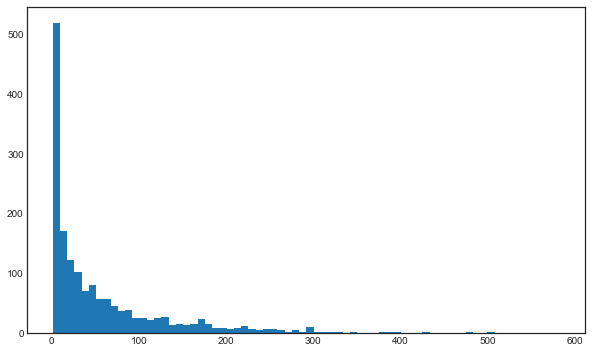

In [24]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'],bins=70)
plt.show()

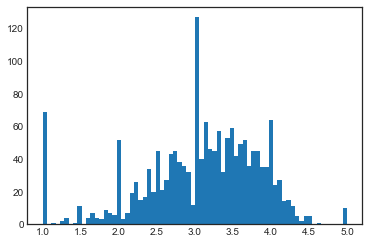

In [25]:
plt.hist(ratings['rating'],bins=70)
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


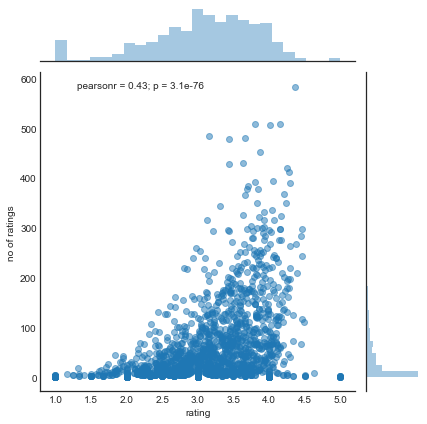

In [26]:
sns.jointplot(x='rating', y='no of ratings',data = ratings,alpha=0.5)

## Creating Movie Recommendation

In [27]:
df.head()

,userid,itemid,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [28]:
#Create movie matrix where rows=userid & column=title
#Entries of matrix=Rating of movies
movie_matrix=df.pivot_table(index=['userid'],columns=['title'],values='rating')

In [29]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings.sort_values('no of ratings',ascending=False).head()

,rating,no of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [31]:
starwars_userrating=movie_matrix['Star Wars (1977)']

In [32]:
starwars_userrating.head()

userid
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [33]:
#co-relation
similar_to_starwars=movie_matrix.corrwith(starwars_userrating)

In [34]:
similar_to_starwars

title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [35]:
#Remove missing values
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [36]:
#Remove NaN values from original object by doing it inplace
corr_starwars.dropna(inplace=True)

In [37]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [38]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [39]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [40]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [41]:
corr_starwars=corr_starwars.join(ratings['no of ratings'])

In [42]:
corr_starwars.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [43]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## Predict Movies

In [44]:
def predict_movies(movie_name):
    movie_userrating=movie_matrix[movie_name]
    similar_to_movie=movie_matrix.corrwith(movie_userrating)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(ratings['no of ratings'])
    predictions=corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation',ascending=False).head()
    
    return predictions

In [45]:
predictions=predict_movies("'Til There Was You (1997)")

In [46]:
predictions.head()

,Correlation,no of ratings
title,,
Beautiful Girls (1996),1.0,115
"Edge, The (1997)",1.0,113
William Shakespeare's Romeo and Juliet (1996),1.0,106
Star Trek: The Wrath of Khan (1982),1.0,244
Dumbo (1941),1.0,123
